In [4]:
import os
import json
import nibabel as nib
import numpy as np
from tqdm.notebook import tqdm

In [5]:
"""
Load training data into images and labels lists

images list consists of CT scans -  numpy arrays of shape (512, 512, n_slices)
labels list consists of ground truth masks -  numpy arrays of shape (512, 512, n_slices), where:
    0 - background class
    1 - regions of consolidation class
"""

path = '../data/preprocessed/' # Replace this line with path to data directory
path_images = os.path.join(path, 'images')
path_labels = os.path.join(path, 'labels')
with open(os.path.join(path, 'training_data.json'), 'r') as f:
    dict_training = json.load(f)

images = []
labels = []
for entry in tqdm(dict_training):
    if len(images) > 10:
        break
    image = nib.load(os.path.join(path_images, entry['image'])[:-3])
    label = nib.load(os.path.join(path_labels, entry['label'])[:-3])
    images.append(image.get_fdata())
    labels.append(label.get_fdata())

  0%|          | 0/40 [00:00<?, ?it/s]

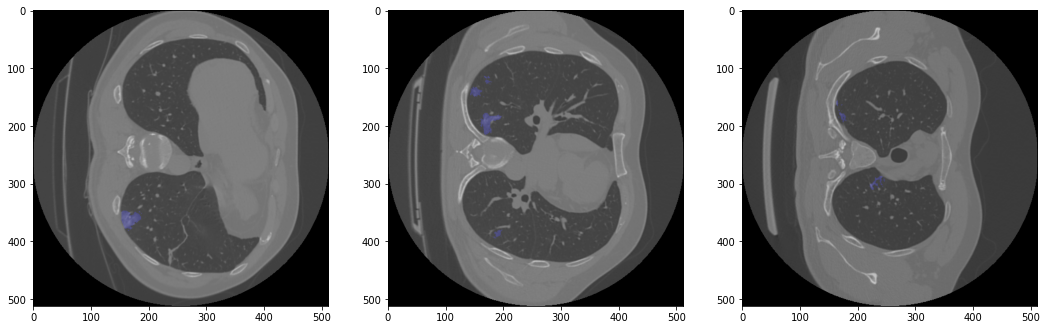

In [6]:
#Visualize some of the slices
from PIL import Image
import matplotlib.pyplot as plt

def blend(image, mask):
    image = image.astype(np.float32)
    min_in = image.min()
    max_in = image.max()
    image = (image - min_in) / (max_in - min_in + 1e-8) * 255
    image = np.dstack((image, image, image)).astype(np.uint8)
    zeros = np.zeros_like(mask)
    mask = np.dstack((zeros, zeros, mask * 255)).astype(np.uint8)
    return Image.blend(
        Image.fromarray(image),
        Image.fromarray(mask),
        alpha=.2
    )

patient_num = 7
slices_num = (10, 20, 30)
slices = []
for idx in slices_num:
    slices.append(blend(
        images[patient_num][..., idx],
        labels[patient_num][..., idx]
    ))

figure = plt.figure(figsize=(18, 18))
for i, image in enumerate(slices):
    ax = figure.add_subplot(1, len(slices), i + 1)
    ax.imshow(slices[i])

In [7]:
"""
Write your code here

You need to:
 0. (Optional) Split your data into training and validation sets.
 1. Create batch generator
 2. Define and train your model using deep learning framework, e.g. PyTorch or Keras
"""


'\nWrite your code here\n\nYou need to:\n 0. (Optional) Split your data into training and validation sets.\n 1. Create batch generator\n 2. Define and train your model using deep learning framework, e.g. PyTorch or Keras\n'

In [8]:
"""
Load testing data into images and labels lists

images list consists of CT scans -  numpy arrays of shape (512, 512, n_slices)
"""
with open('testing_data.json', 'r') as f:
    dict_testing = json.load(f)

images_testig = []
for entry in tqdm(dict_testing):
    image = nib.load(os.path.join(path_images, entry['image']))
    images.append(image.get_fdata())

FileNotFoundError: [Errno 2] No such file or directory: 'testing_data.json'

In [ ]:
"""
Write your code here

You need to:
 1. Predict labels for CT scans from images list
 2. Store them in the labels_predicted list in form of numpy arrays of shape (512, 512, n_slices), where:
    0 - background class
    1 - regions of consolidation class
"""
labels_predicted = []

In [ ]:
# Visualize some of the predictions

patient_num = 5
slices_num = (10, 20, 30)
slices = []
for idx in slices_num:
    slices.append(blend(
        images[patient_num][..., idx],
        labels_predicted[patient_num][..., idx]
    ))

figure = plt.figure(figsize=(18, 18))
for i, image in enumerate(slices):
    ax = figure.add_subplot(1, len(slices), i + 1)
    ax.imshow(slices[i])

In [ ]:
# Execute this cell for submission file generation 
import csv

def rle_encoding(x):
    dots = np.where(x.T.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b > prev + 1):
            run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return [str(item) for item in run_lengths]

with open("submission.csv", "wt") as sb:
    submission_writer = csv.writer(sb, delimiter=',')
    submission_writer.writerow(["Id", "Predicted"])
    for idx, patient in tqdm(enumerate(labels_predicted)):
        submission_writer.writerow([
                f"{idx}",
                " ".join(rle_encoding(patient))
            ])